# Q. 1.
Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works. 

In [19]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import pydotplus
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



In [7]:
diabetes_df = pd.read_csv("../dataset/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome'].values

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24, stratify=y)

#resample
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

X_res, y_res = resample.fit_resample(X_train,y_train)

In [6]:
display(X.shape, X_res.shape)

(768, 8)

(386, 8)

Oversampling methods duplicate or create new synthetic examples in the minority class, whereas undersampling methods delete or merge examples in the majority class. Both types of resampling can be effective when used in isolation, although can be more effective when both types of methods are used together.
In SMOTE-ENN, SMOTE is used as oversampling method in combination with undersampling method, the Edited Nearest Neighbors, or ENN, rule. This rule involves using k=3 nearest neighbors to locate those examples in a dataset that are misclassified and that are then removed.

# Q. 2.
Perform logistic regression with the new data from question 1.  

    Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset. 

In [11]:
# Instantiating logistic regression classifier
logreg = LogisticRegression(solver='newton-cg')
  
mdl_outcome_tune = logreg.fit(X_res, y_res)


In [14]:
y_pred = mdl_outcome_tune.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
display(conf_matrix)
TN=conf_matrix[0,0]
FN=conf_matrix[1,0]
TP=conf_matrix[1,1]
FP=conf_matrix[0,1]

print("Sensitivity score for resampled model is {}".format(TP/(TP+FN)))

array([[92, 58],
       [10, 71]], dtype=int64)

Sensitivity score for resampled model is 0.8765432098765432


In [15]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.61      0.90      0.73       102
           1       0.88      0.55      0.68       129

    accuracy                           0.71       231
   macro avg       0.74      0.73      0.70       231
weighted avg       0.76      0.71      0.70       231



Using the combination of both oversampling and undersampling methods is giving us a better recall and precision score.

# Q. 3.
Create an ROC Curve for the model and calculate the AUC.  

    BRIEFLY explain what the ROC Curve shows and what the resulting AUC means.  



ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve. AUC provides an aggregate measure of performance across all possible classification thresholds.


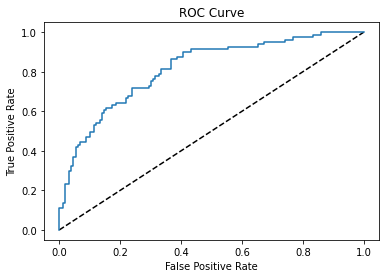

In [16]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


# Plot ROC curve

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_auc_score(y_test, y_pred_prob)

0.8138271604938271

In [20]:
cv_scores = cross_val_score(logreg, X, y, cv=5,scoring='roc_auc')
print(np.mean(cv_scores))

0.8326946191474492


# Q. 4.
What is outlier detection? Why is it useful? What methods can you use for outlier detection? 

An Outlier is that observation which is significantly different from all other observations. Outlier detection is finding outliers in the training dataset if the training data is polluted by outliers. It can be important to identify and remove outliers from data when training machine learning algorithms for predictive modeling. Outliers can skew statistical measures and data distributions, providing a misleading representation of the underlying data and relationships.  Removing outliers from training data prior to modeling can result in a better fit of the data and, in turn, more skillful predictions.

Some of the most popular methods for outlier detection are:

    Z-Score or Extreme Value Analysis (parametric)
    Probabilistic and Statistical Modeling (parametric)
    Linear Regression Models (PCA, LMS)
    Proximity Based Models (non-parametric)
    Information Theory Models
    High Dimensional Outlier Detection Methods (high dimensional sparse data)

# Z Score


Z-score is a parametric outlier detection method in a one or low dimensional feature space.

This technique assumes a Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean.


# Dbscan (Density Based Spatial Clustering of Applications with Noise)

Relationships between features, trends and populations in a data set can be graphically represented via clustering methods like dbscan, and can also be applied to detect outliers in nonparametric distributions in many dimensions.

Dbscan is a density based clustering algorithm, it is focused on finding neighbors by density (MinPts) on an ‘n-dimensional sphere’ with radius ɛ. A cluster can be defined as the maximal set of ‘density connected points’ in the feature space.


# Isolation Forests

Isolation forest’s basic principle is that outliers are few and far from the rest of the observations. To build a tree (training), the algorithm randomly picks a feature from the feature space and a random split value ranging between the maximums and minimums. This is made for all the observations in the training set. To build the forest a tree ensemble is made averaging all the trees in the forest.

# Q. 5.

Perform a linear SVM to predict credit approval (last column) using this dataset:

In [21]:
aca_df = pd.read_csv("../dataset/australian.dat", sep="\s+",header=None)
aca_df.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']

In [22]:
display(aca_df.shape)
aca_df.head()

(690, 15)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [23]:
X = aca_df.drop('A15',axis=1)
y = aca_df['A15']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 25)

from sklearn.svm import SVC

classifier = SVC(kernel='linear')

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)



In [24]:
classifier.score(X_test,y_test)

0.8115942028985508

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       112
           1       0.80      0.79      0.79        95

    accuracy                           0.81       207
   macro avg       0.81      0.81      0.81       207
weighted avg       0.81      0.81      0.81       207



# Q. 6.
What kinds of jobs in data are you most interested in? 

Data Engineering jobs. As I do not have as strong as a background required for data science jobs, I would like to start with data engineering and management. I want to eventually be able to not just transform but also analyse the data well, however, the course has definitely gotten harder having not known much math. I like a challenge and feel like that I would find a lot of things to keep my interest.